In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Masking

Using TensorFlow backend.
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\silva\AppData\Roa

In [2]:
def scale(training_set):
    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    # Creating a data structure with 10 time-steps and 1 output
    X_train = []
    y_train = []
    for i in range(10, training_set.shape[0]):
        X_train.append(training_set_scaled[i-10:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train, y_train, sc

In [17]:
def train_LSTM(X_train, y_train):
    model = Sequential()
    model.add(Masking(mask_value=-1, input_shape = (X_train.shape[1], 1)))
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = 100, batch_size = 32)
    return model

In [4]:
def predict(dataset_train, dataset_test, model, sc):
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    inputs = dataset_total[len(dataset_total) - dataset_test.shape[0] - 10:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(10, inputs.shape[0]):
        X_test.append(inputs[i-10:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    print(X_test.shape)
    # (273, 60, 1)
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    return X_test, predicted_stock_price

In [5]:
def plot_results(dataset_test, predicted_stock_price):
    # Visualising the results
    plt.plot(dataset_test.values, color = 'red', label = 'Real')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted')
    plt.xticks(np.arange(0,dataset_test.shape[0],50))
    plt.xlabel('Time')
    plt.ylabel('Index')
    plt.legend()
    plt.show()

In [11]:
def impute_with_prediction(df_orig, df_imputed):
    for i in df_orig.index:
        if pd.isna(df_orig.loc[i]):
            df_orig.at[i] = df_imputed.loc[i]
    return df_orig

In [12]:
INPUT = 'output/\CompleteWeeklyIndexes'
df = pd.read_csv(INPUT+'.csv', parse_dates=True, index_col=0)

Epoch 1/10
772/772 [==============================] - 7s 9ms/step - loss: 0.0621
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0042


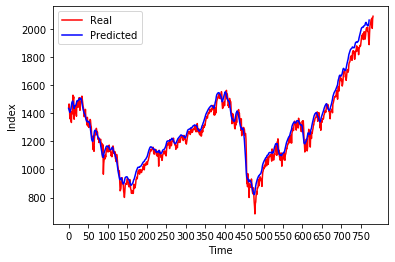

(272, 10, 1)


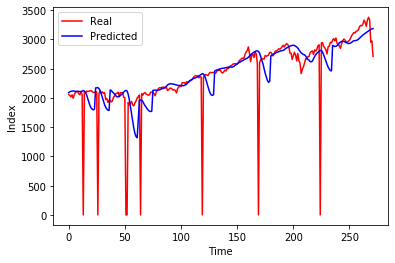

Epoch 1/10
772/772 [==============================] - 8s 10ms/step - loss: 0.0268
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0068


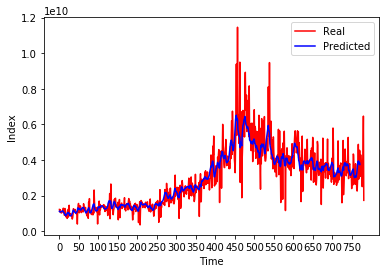

(272, 10, 1)


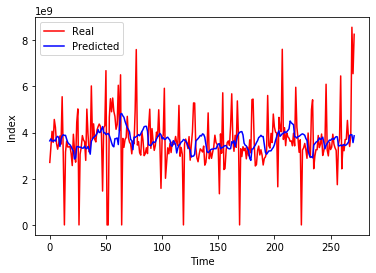

Epoch 1/10
772/772 [==============================] - 18s 24ms/step - loss: 0.0274
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0097
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0097
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0092
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0090


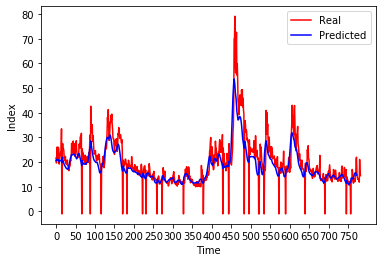

(272, 10, 1)


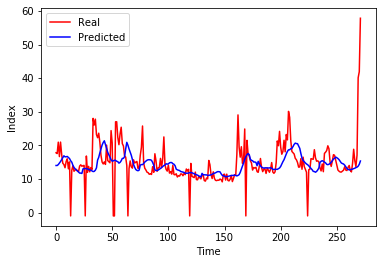

Epoch 1/10
772/772 [==============================] - 11s 15ms/step - loss: 0.3171
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0512
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0450
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0420
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0410
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0397
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0402
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0419
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0437
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0401


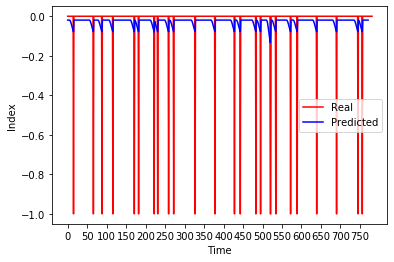

(272, 10, 1)


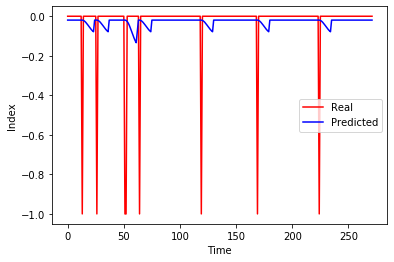

Epoch 1/10
772/772 [==============================] - 25s 32ms/step - loss: 0.1312
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0257
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0233
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0243
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0209
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0204
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0199
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0204
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0191
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0182


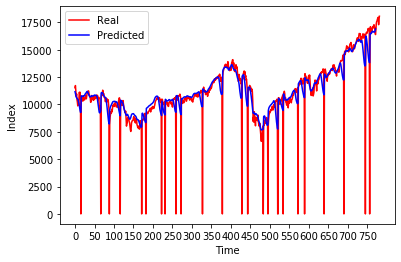

(272, 10, 1)


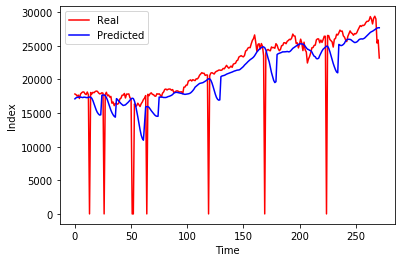

Epoch 1/10
772/772 [==============================] - 9s 12ms/step - loss: 0.0402
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0214
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0205
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0207
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0214
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0202
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0198
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0211
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0206
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0204


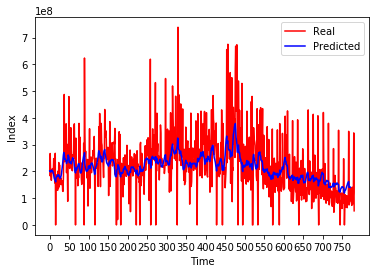

(272, 10, 1)


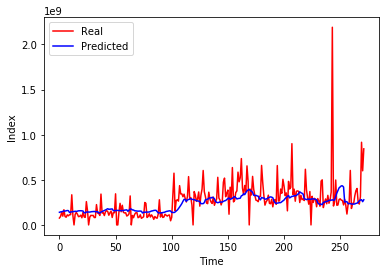

Epoch 1/10
772/772 [==============================] - 9s 12ms/step - loss: 0.0770
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0221
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0128
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0117


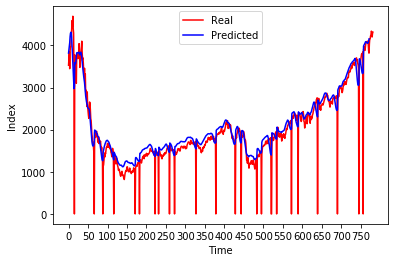

(272, 10, 1)


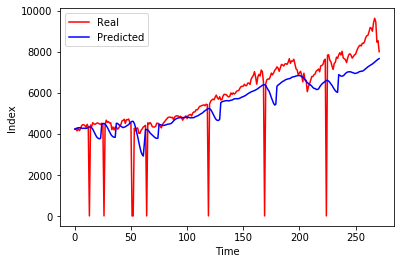

Epoch 1/10
772/772 [==============================] - 25s 32ms/step - loss: 0.0703
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0224
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0219
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0225
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0217
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0218
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0216
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0218
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0218


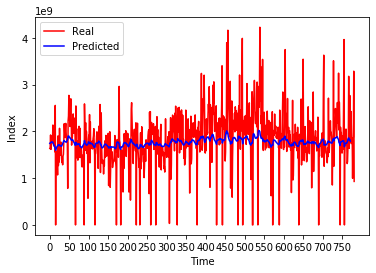

(272, 10, 1)


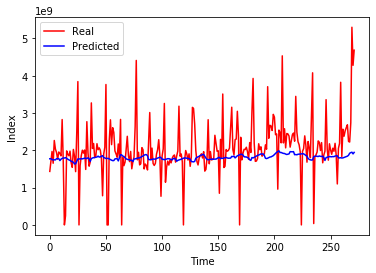

Epoch 1/10
772/772 [==============================] - 12s 16ms/step - loss: 0.1200
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0308
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0269
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0266A: 0s - loss: 0
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0230
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0279
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0245
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0244
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0257
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0249


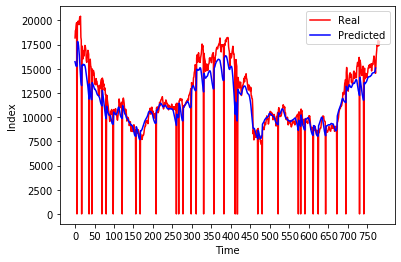

(272, 10, 1)


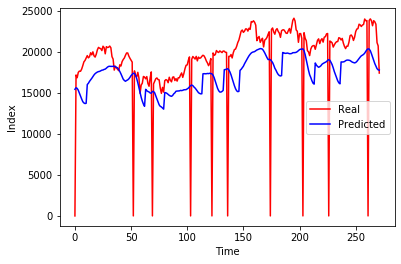

Epoch 1/10
772/772 [==============================] - 12s 15ms/step - loss: 0.0293
Epoch 2/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0125A: 0s - loss: 0.0
Epoch 3/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0103
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0127A: 0s - loss: 0.012
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0102
Epoch 9/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0108A: 0s - loss
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0110A: 0s - loss: 0.01


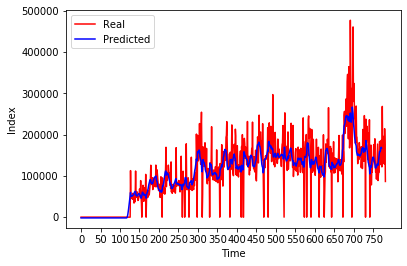

(272, 10, 1)


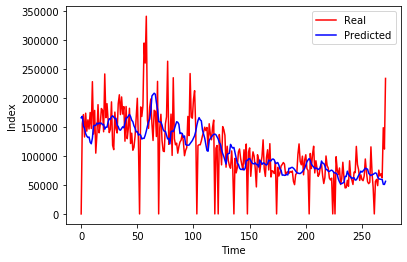

Epoch 1/10
772/772 [==============================] - 16s 21ms/step - loss: 0.1832
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0426A: 0s - 
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0386
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0366
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0371
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0354
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0363
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 9/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0339
Epoch 10/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0369


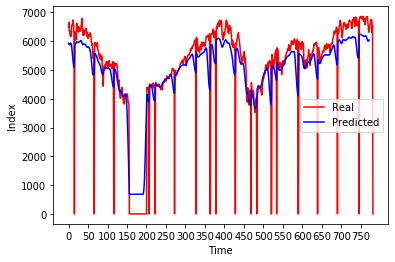

(272, 10, 1)


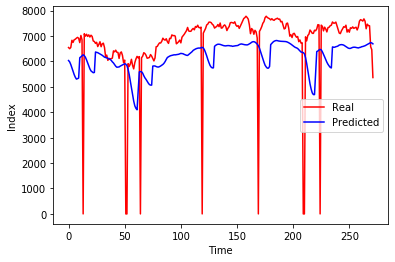

Epoch 1/10
772/772 [==============================] - 13s 17ms/step - loss: 0.0270
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0152
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0129A: 0s - loss: 0
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0125
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0118


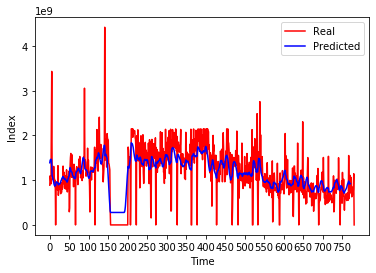

(272, 10, 1)


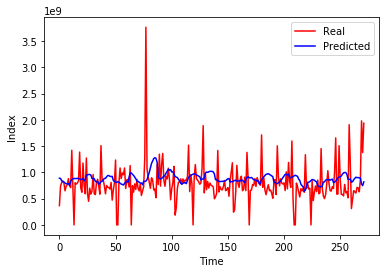

Epoch 1/10
772/772 [==============================] - 25s 32ms/step - loss: 0.1168
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0365
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0322
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0303
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0303
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0290A: 0s 
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0292
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0274
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0291
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0283


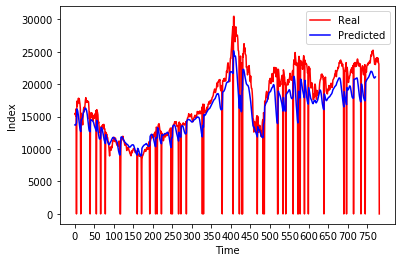

(272, 10, 1)


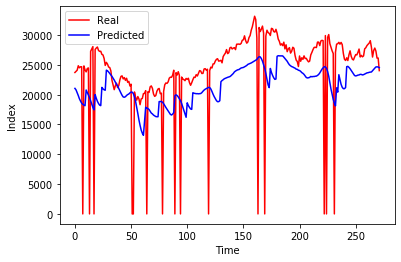

Epoch 1/10
772/772 [==============================] - 25s 32ms/step - loss: 0.0240
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 4/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 5/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 6/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0109A: 1s -
Epoch 7/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 8/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 9/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 10/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0099


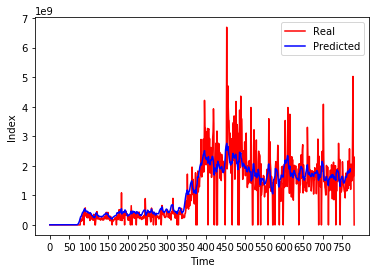

(272, 10, 1)


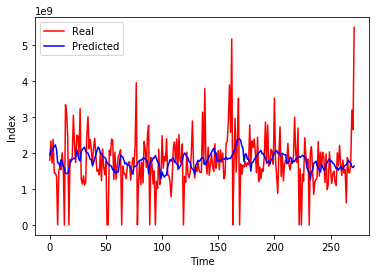

Epoch 1/10
772/772 [==============================] - 19s 25ms/step - loss: 0.1505
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0252
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0234
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0211
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0193
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0181
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0192
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0186
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0189
Epoch 10/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0171


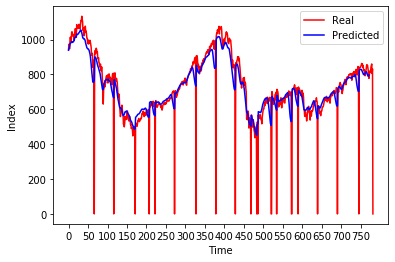

(272, 10, 1)


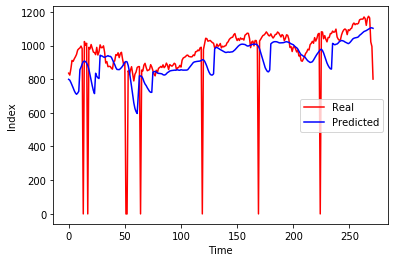

Epoch 1/10
772/772 [==============================] - 18s 23ms/step - loss: 0.0258
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0098
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 10/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0096A: 0s - loss: 0.009


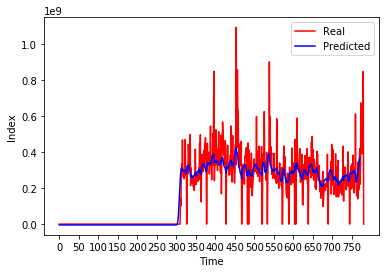

(272, 10, 1)


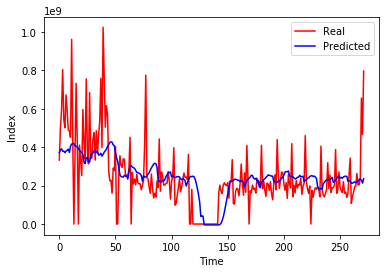

Epoch 1/10
772/772 [==============================] - 26s 34ms/step - loss: 0.0107
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0106
Epoch 5/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0109A: 0s - loss: 0.
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0106
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0106
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0106
Epoch 9/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 10/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0106


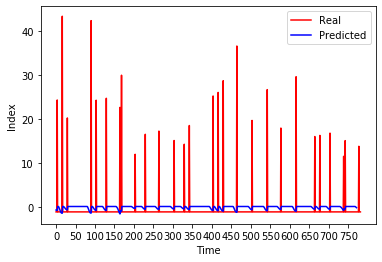

(272, 10, 1)


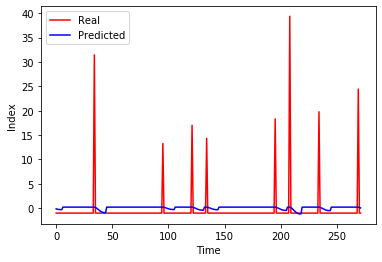

Epoch 1/10
772/772 [==============================] - 32s 41ms/step - loss: 0.0030
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 9/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 10/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0029


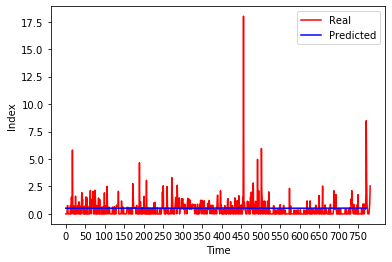

(272, 10, 1)


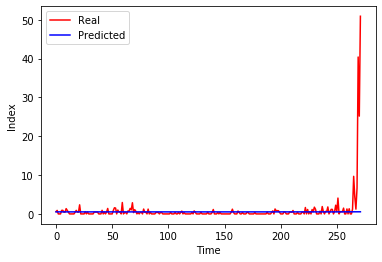

Epoch 1/10
772/772 [==============================] - 21s 27ms/step - loss: 0.0065 17
Epoch 2/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 3/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 4/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 5/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0065A: 0s - lo
Epoch 6/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 7/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 8/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0064A: 1s - loss - ETA: 0s - l
Epoch 9/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 10/10
772/772 [==============================] - 2s 3ms/step - loss: 0.0064A: 0s - 


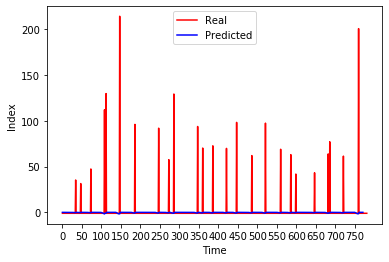

(272, 10, 1)


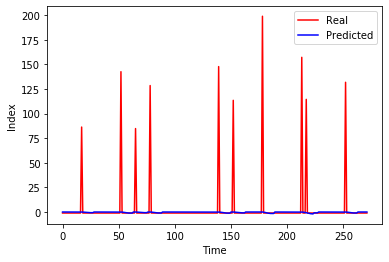

Epoch 1/10
772/772 [==============================] - 17s 22ms/step - loss: 0.0075
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0075A: 0s - loss: 0.007
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0078
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 9/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 10/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0075


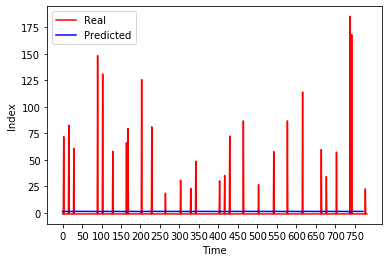

(272, 10, 1)


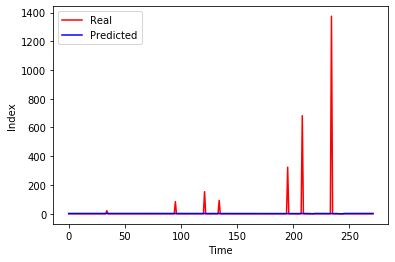

Epoch 1/10
772/772 [==============================] - 15s 19ms/step - loss: 0.0055 23s  - ETA: 6s - loss
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0056A: 0s -
Epoch 3/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 4/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 5/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 6/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 9/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 10/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0055


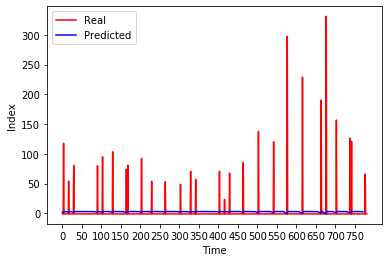

(272, 10, 1)


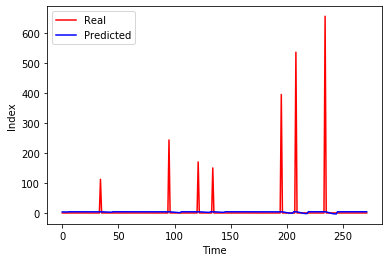

Epoch 1/10
772/772 [==============================] - 23s 30ms/step - loss: 0.0328
Epoch 2/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0323
Epoch 3/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0323
Epoch 4/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0322A: 0s - loss: 0.032
Epoch 5/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0325
Epoch 6/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0323
Epoch 7/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0329A: 0s - loss: 0.
Epoch 8/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0324
Epoch 9/10
772/772 [==============================] - 2s 2ms/step - loss: 0.0323
Epoch 10/10
772/772 [==============================] - 1s 2ms/step - loss: 0.0322A: 


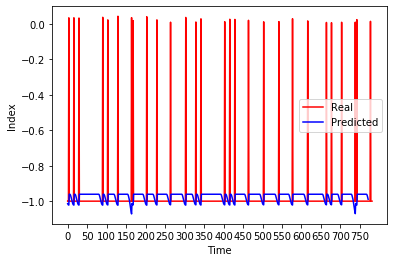

(272, 10, 1)


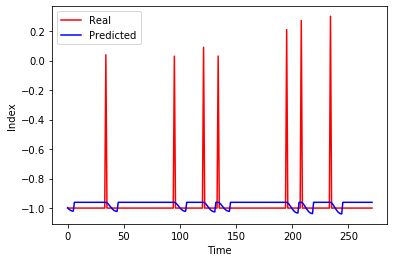

In [15]:
df_train_complete = None
df_test_complete = None
for col in df.columns:
    test_set = df.loc['2015-01-02':, col].fillna(-1).values #Selecting test data
    training_set = df.loc['2000-01-01':'2015-01-01', col].fillna(-1).values #Selecting training data
    training_set = training_set.reshape(-1, 1)
    X_train, y_train, sc = scale(training_set)
    model = train_LSTM(X_train, y_train)
    # Dados de treinamento
    predicted_stock_price_train = model.predict(X_train)
    predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)
    plot_results(df.loc['2000-01-01':'2015-01-01', col].fillna(-1), predicted_stock_price_train)
    # Dados de teste
    X_test, predicted_stock_price = predict(df.loc['2000-01-01':'2015-01-01', col].fillna(-1), df.loc['2015-01-02':, col].fillna(-1), model, sc)
    plot_results(df.loc['2015-01-02':, col].fillna(-1), predicted_stock_price)
    
    vazio = np.empty(10)
    predicted_stock_price_train = np.append(vazio, predicted_stock_price_train)
    series_complete_train = impute_with_prediction(df.loc['2000-01-01':'2015-01-01', col], pd.DataFrame(index=df.loc['2000-01-01':'2015-01-01', col].index, data=predicted_stock_price_train))
    df_train_complete = pd.concat([df_train_complete, pd.DataFrame(index=df.loc['2000-01-01':'2015-01-01', col].index, data=series_complete_train, columns=[col])], axis=1, join='outer')
    df_test_complete = pd.concat([df_test_complete, pd.DataFrame(data=predicted_stock_price, index = df.loc['2015-01-02':, col].index, columns = [col])], axis=1, join='outer')

In [16]:
df_train_complete.to_csv(r'output\/CompleteIndexesWeeklyTrainLSTM.csv', index = True)
df_test_complete.to_csv(r'output\/CompleteIndexesWeeklyTestLSTM.csv', index = True)